 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_null_counts = whale_returns_df.isnull().sum()
print(whale_null_counts)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_null_count = algo_returns_df.isnull().sum()
print(algo_null_count)

Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_null_count = algo_returns_df.isnull().sum()
print(algo_null_count)

Algo 1    0
Algo 2    0
dtype: int64


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
print(sp500_history_df.dtypes)

Close    object
dtype: object


In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df = sp500_history_df.astype({'Close':'float64'})
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_history_df.sort_index(inplace=True)
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_history_df.dropna(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
sp500_history_df.rename(columns={'Close':'S&P500'}, inplace=True)
sp500_history_df.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
daily_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis='columns', join="inner")
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

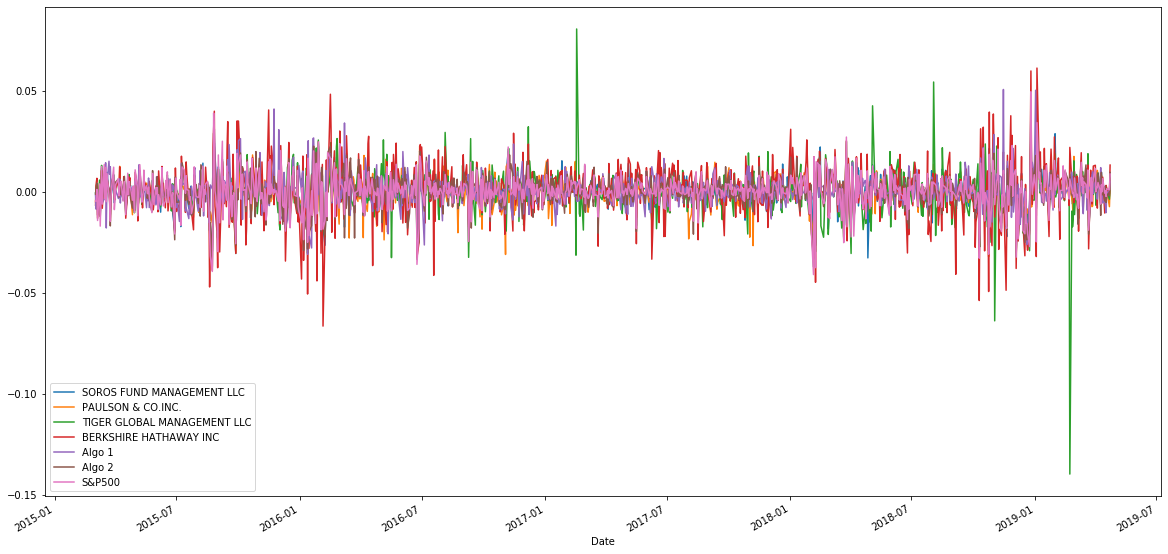

In [15]:
# Plot daily returns
daily_returns.plot(figsize=(20,10))

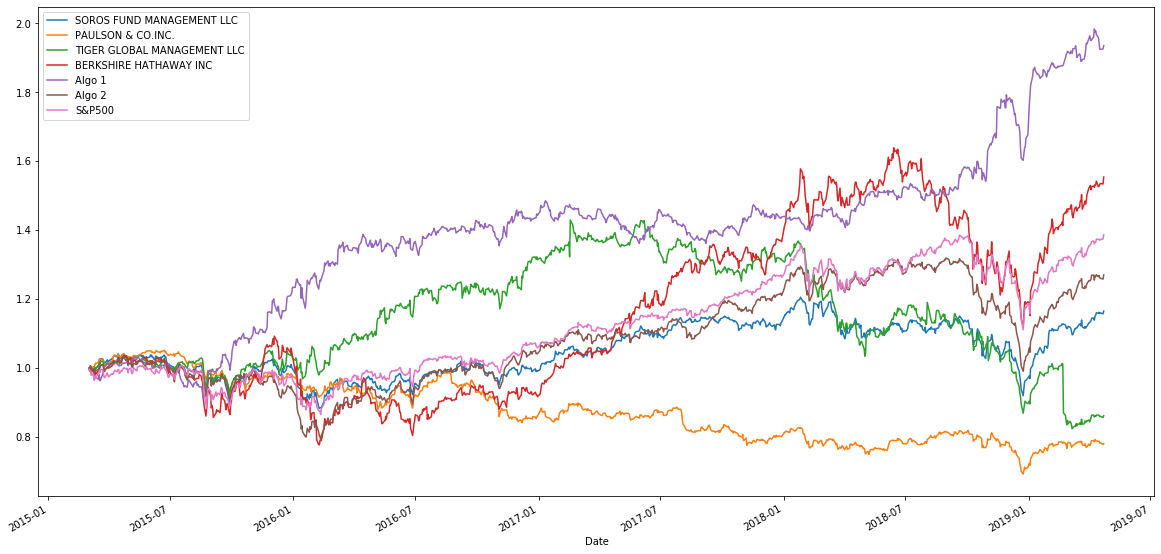

In [16]:
# Plot cumulative returns
cum_returns = (1 + daily_returns).cumprod() 
cum_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

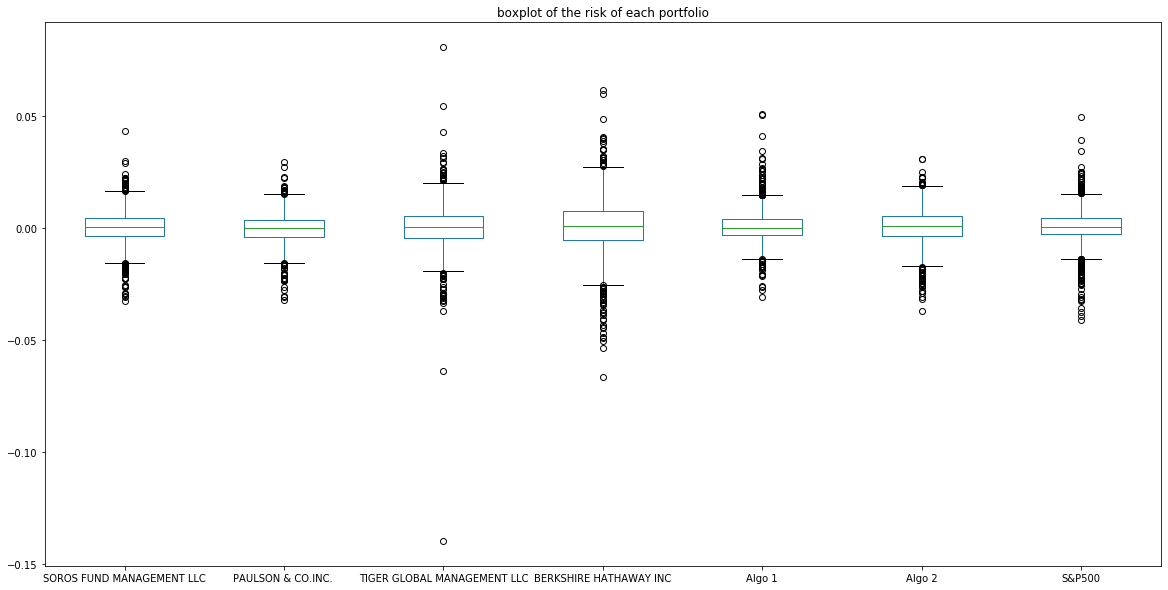

In [17]:
# Box plot to visually show risk
daily_returns.plot.box(figsize=(20,10), title="boxplot of the risk of each portfolio")

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

daily_std = daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
# From the above output we know the standard deviation of S&P 500. is 0.008554
daily_std.ge(0.008554)

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
print(annualized_std)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

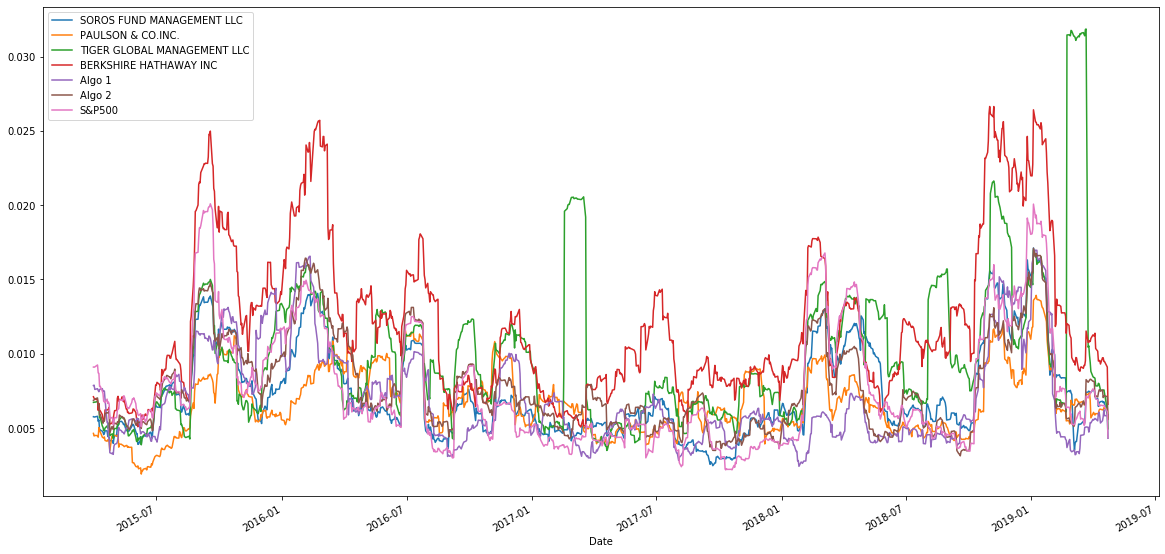

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_std = daily_returns.rolling(window=21).std()
rolling_std.plot(figsize=(20,10))

In [22]:
# Construct a correlation table
daily_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


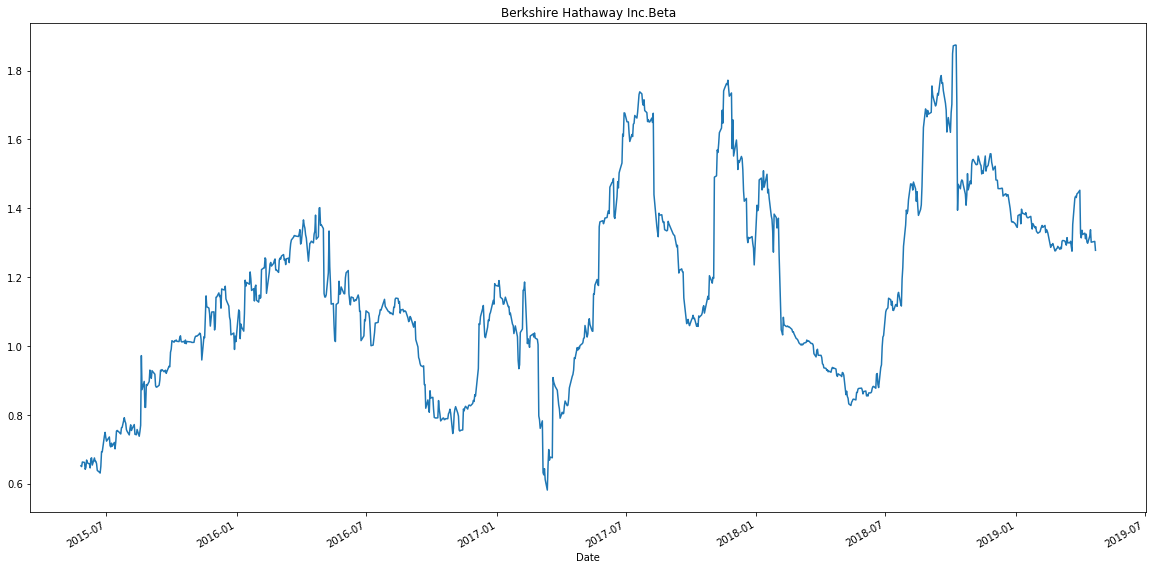

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
bhi_rolling_cov = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P500'])
sp500_rolling_var = daily_returns['S&P500'].rolling(window=60).var()
beta_bhi = bhi_rolling_cov / sp500_rolling_var
beta_bhi.plot(figsize=(20,10), title='Berkshire Hathaway Inc.Beta')

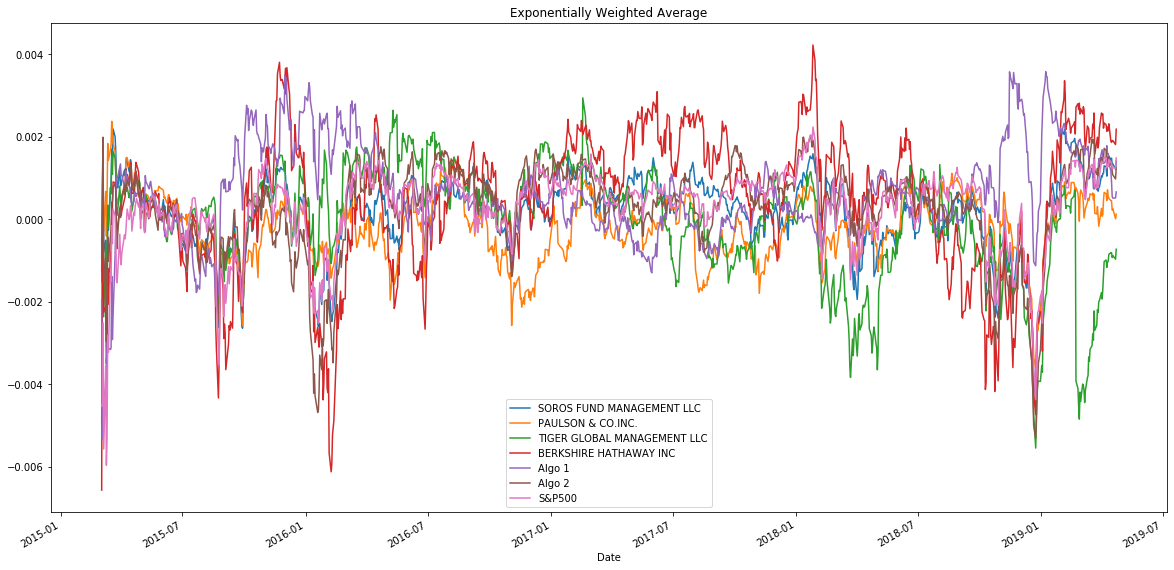

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_ewm = daily_returns.ewm(halflife=21).mean()
rolling_ewm.plot(figsize=(20,10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = daily_returns.mean() * 252 / (daily_returns.std() * np.sqrt(252))
print(sharpe_ratio)

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64


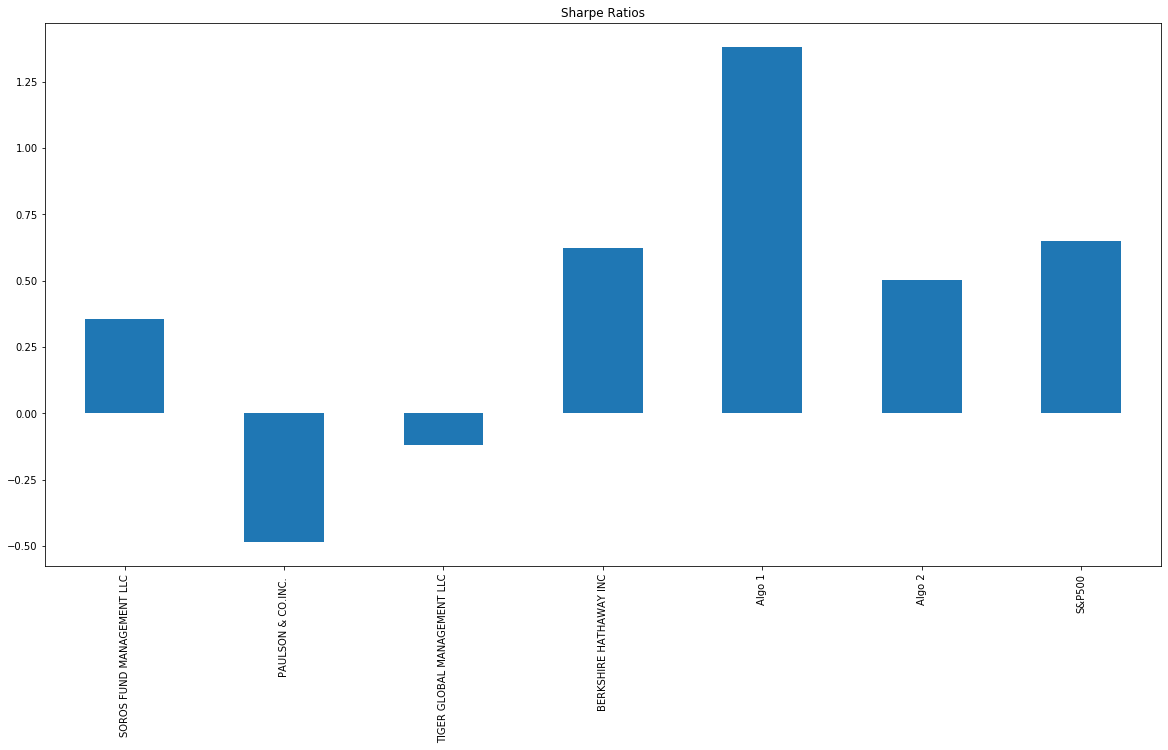

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', figsize=(20,10), title='Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
amzn_path = Path('Resources/amzn_data.csv')
amzn_df = pd.read_csv(amzn_path)
amzn_df['Date'] = amzn_df['Date'].str.replace('16:00:00','')
amzn_df.set_index(pd.to_datetime(amzn_df['Date'], infer_datetime_format=True), inplace=True)
amzn_df.drop(columns=['Date'],inplace=True)
amzn_df.head()

,Close,Symbol
Date,,
2015-02-03,385.66,AMZN
2015-03-03,384.61,AMZN
2015-04-03,382.72,AMZN
2015-05-03,387.83,AMZN
2015-06-03,380.09,AMZN


In [28]:
# Read the second stock
fb_path = Path('Resources/fb_data.csv')
fb_df = pd.read_csv(fb_path)
fb_df['Date'] = fb_df['Date'].str.replace('16:00:00','')
fb_df.set_index(pd.to_datetime(fb_df['Date'], infer_datetime_format=True), inplace=True)
fb_df.drop(columns=['Date'], inplace=True)
fb_df.head()

,Close,Symbol
Date,,
2015-02-03,79.75,FB
2015-03-03,79.60,FB
2015-04-03,80.90,FB
2015-05-03,81.21,FB
2015-06-03,80.01,FB


In [29]:
# Read the third stock
alibaba_path = Path('Resources/alibaba_data.csv')
alibaba_df = pd.read_csv(alibaba_path)
alibaba_df['Date'] = alibaba_df['Date'].str.replace('16:00:00','')
alibaba_df.set_index(pd.to_datetime(alibaba_df['Date'], infer_datetime_format=True), inplace=True)
alibaba_df.drop(columns=['Date'], inplace=True)
alibaba_df.head()

,Close,Symbol
Date,,
2015-02-03,84.00,BABA
2015-03-03,81.58,BABA
2015-04-03,85.49,BABA
2015-05-03,86.10,BABA
2015-06-03,84.40,BABA


In [30]:
# Read the fourthh stock
tsla_path = Path('Resources/tsla_data.csv')
tsla_df = pd.read_csv(tsla_path)
tsla_df['Date'] = tsla_df['Date'].str.replace('16:00:00','')
tsla_df.set_index(pd.to_datetime(tsla_df['Date'], infer_datetime_format=True), inplace=True)
tsla_df.drop(columns=['Date'], inplace=True)
tsla_df.head()

,Close,Symbol
Date,,
2015-02-03,197.33,TSLA
2015-03-03,199.56,TSLA
2015-04-03,202.44,TSLA
2015-05-03,200.63,TSLA
2015-06-03,193.88,TSLA


In [31]:
# Read the fifth stock
nflx_path = Path('Resources/nflx_data.csv')
nflx_df = pd.read_csv(nflx_path)
nflx_df['Date'] = nflx_df['Date'].str.replace('16:00:00','')
nflx_df.set_index(pd.to_datetime(nflx_df['Date'], infer_datetime_format=True), inplace=True)
nflx_df.drop(columns=['Date'], inplace=True)
nflx_df.head()

,Close,Symbol
Date,,
2015-02-03,68.61,NFLX
2015-03-03,67.82,NFLX
2015-04-03,67.11,NFLX
2015-05-03,66.81,NFLX
2015-06-03,64.87,NFLX


In [32]:
# Concatenate all stocks into a single DataFrame
stocks = pd.concat([amzn_df, fb_df,alibaba_df, tsla_df, nflx_df], axis='rows', join='inner')
stocks.head()

,Close,Symbol
Date,,
2015-02-03,385.66,AMZN
2015-03-03,384.61,AMZN
2015-04-03,382.72,AMZN
2015-05-03,387.83,AMZN
2015-06-03,380.09,AMZN


In [33]:
# Reset the index
stocks = stocks.reset_index()
stocks.head()

,Date,Close,Symbol
0,2015-02-03,385.66,AMZN
1,2015-03-03,384.61,AMZN
2,2015-04-03,382.72,AMZN
3,2015-05-03,387.83,AMZN
4,2015-06-03,380.09,AMZN


In [34]:
# Pivot so that each column of prices represents a unique symbol
stocks_returns = stocks.pivot_table(values="Close", index="Date", columns="Symbol")
stocks_returns.head()

Symbol,AMZN,BABA,FB,NFLX,TSLA
Date,,,,,
2015-01-04,370.26,82.36,81.67,59.02,187.59
2015-01-05,422.87,81.17,78.99,79.58,226.03
2015-01-06,430.92,90.78,80.29,89.00,249.45
2015-01-07,437.39,82.46,86.91,93.64,269.15
2015-01-09,496.54,64.83,87.23,105.79,238.63


In [35]:
# Drop Nulls
stocks_returns.dropna(inplace=True)
stocks_returns.head()

Symbol,AMZN,BABA,FB,NFLX,TSLA
Date,,,,,
2015-01-04,370.26,82.36,81.67,59.02,187.59
2015-01-05,422.87,81.17,78.99,79.58,226.03
2015-01-06,430.92,90.78,80.29,89.00,249.45
2015-01-07,437.39,82.46,86.91,93.64,269.15
2015-01-09,496.54,64.83,87.23,105.79,238.63


In [36]:
# Calculate daily returns for each of the stock
custom_portfolio_daily_returns = stocks_returns.pct_change().dropna()
custom_portfolio_daily_returns.head()

Symbol,AMZN,BABA,FB,NFLX,TSLA
Date,,,,,
2015-01-05,0.142089,-0.014449,-0.032815,0.348356,0.204915
2015-01-06,0.019037,0.118393,0.016458,0.118371,0.103615
2015-01-07,0.015014,-0.091650,0.082451,0.052135,0.078974
2015-01-09,0.135234,-0.213801,0.003682,0.129752,-0.113394
2015-01-10,0.048697,-0.091933,0.042646,0.001796,0.005238


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
custom_portfolio_daily_returns['weighted'] = custom_portfolio_daily_returns.dot(weights)
weighted_custom_portfolio_returns = pd.DataFrame(custom_portfolio_daily_returns['weighted'])
weighted_custom_portfolio_returns.head()

,weighted
Date,
2015-01-05,0.129619
2015-01-06,0.075175
2015-01-07,0.027385
2015-01-09,-0.011705
2015-01-10,0.001289


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_portfolio_returns = pd.concat([weighted_custom_portfolio_returns, daily_returns], axis="columns", join="inner")
all_portfolio_returns.head()

,weighted,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2015-03-03,-0.266923,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-06,0.168183,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.085124,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-11,0.118450,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.069060,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna(inplace=True)
all_portfolio_returns.head()

,weighted,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2015-03-03,-0.266923,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-06,0.168183,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.085124,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-11,0.118450,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.069060,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [40]:
# Risk
# Calculate the annualized standard deviation
all_portfolio_annualized_std = all_portfolio_returns.std() * np.sqrt(252)
print(all_portfolio_annualized_std)

weighted                       1.015236
SOROS FUND MANAGEMENT LLC      0.127720
PAULSON & CO.INC.              0.111750
TIGER GLOBAL MANAGEMENT LLC    0.176409
BERKSHIRE HATHAWAY INC         0.208800
Algo 1                         0.121196
Algo 2                         0.133646
S&P500                         0.136539
dtype: float64


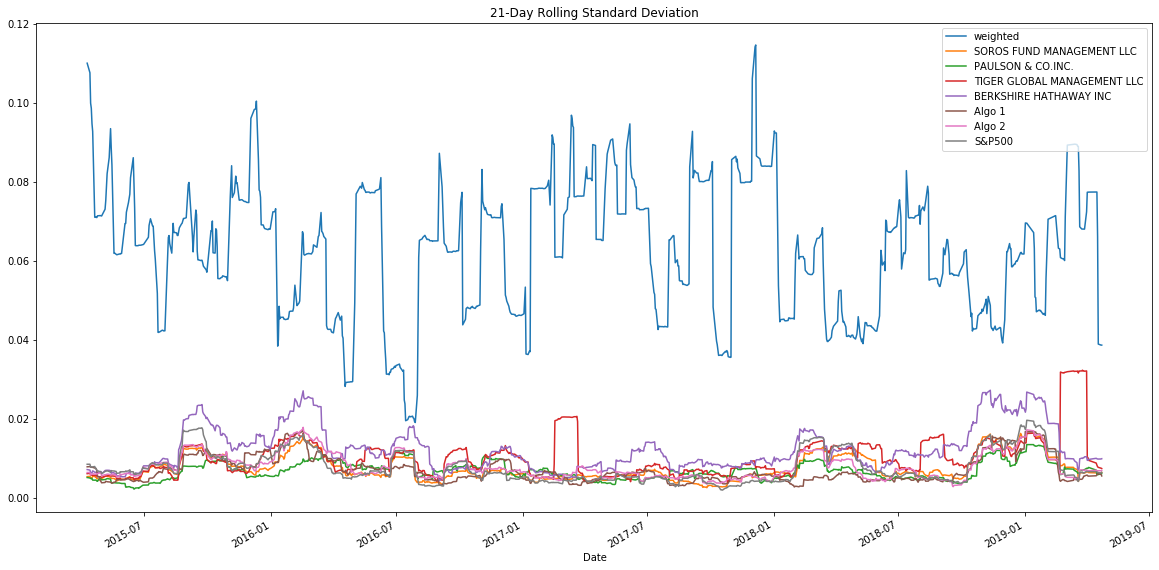

In [41]:
# Rolling
rolling_std = all_portfolio_returns.rolling(window=21).std()
rolling_std.plot(figsize=(20,10), title="21-Day Rolling Standard Deviation")

In [42]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = all_portfolio_returns.mean() * 252 / (all_portfolio_returns.std() * np.sqrt(252))

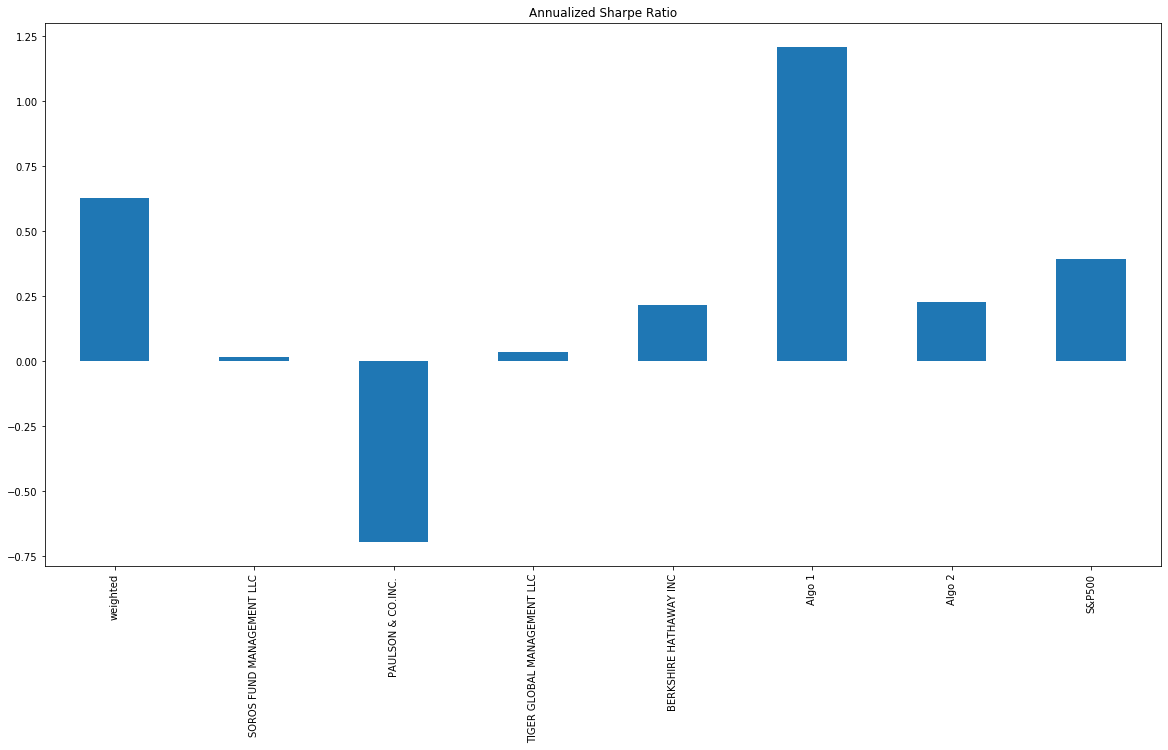

In [43]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", figsize=(20,10), title="Annualized Sharpe Ratio")

In [44]:
# Create a correlation analysis
all_portfolio_returns.corr()

,weighted,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
weighted,1.000000,0.081895,0.082355,0.072195,0.116572,0.011397,0.081805,0.087587
SOROS FUND MANAGEMENT LLC,0.081895,1.000000,0.707739,0.559833,0.761071,0.318681,0.832011,0.846674
PAULSON & CO.INC.,0.082355,0.707739,1.000000,0.441154,0.567000,0.272583,0.698820,0.689219
TIGER GLOBAL MANAGEMENT LLC,0.072195,0.559833,0.441154,1.000000,0.417446,0.161884,0.507675,0.617901
BERKSHIRE HATHAWAY INC,0.116572,0.761071,0.567000,0.417446,1.000000,0.296671,0.696938,0.762715
Algo 1,0.011397,0.318681,0.272583,0.161884,0.296671,1.000000,0.286709,0.276247
Algo 2,0.081805,0.832011,0.698820,0.507675,0.696938,0.286709,1.000000,0.864463
S&P500,0.087587,0.846674,0.689219,0.617901,0.762715,0.276247,0.864463,1.000000


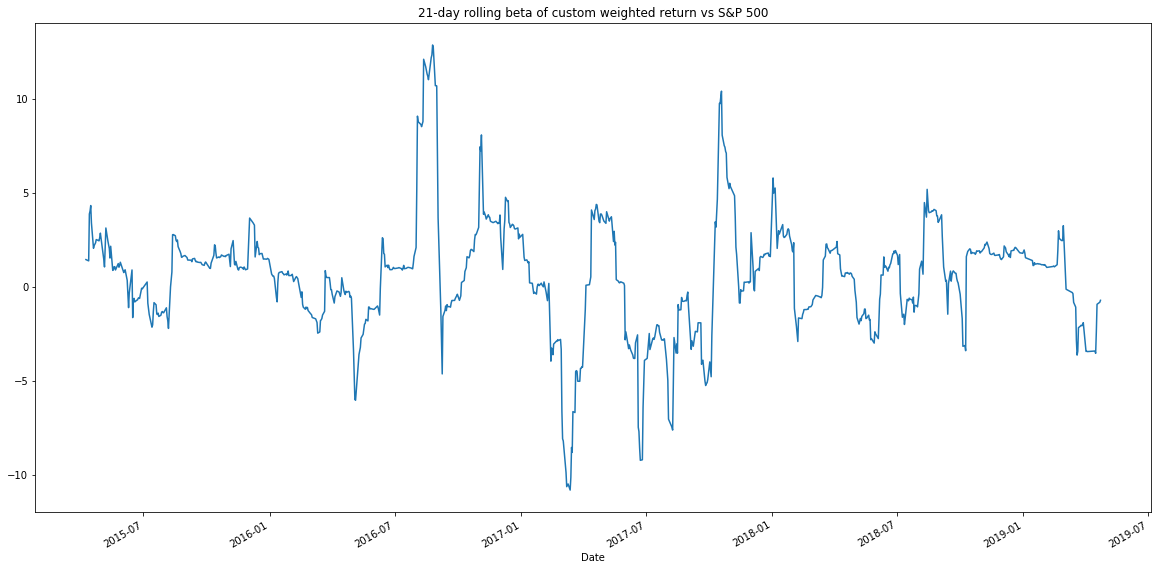

In [45]:
# Beta
# Calculate the rolling variance of the S&P500
rolling_sp500_var = all_portfolio_returns['S&P500'].rolling(window=21).var()
# Calculate the rotating covariance of the weighted custom porfolio returns vs S&P500
rolling_cov = all_portfolio_returns['weighted'].rolling(window=21).cov(all_portfolio_returns['S&P500'])
# Calculate the rolling beta 
rolling_beta = rolling_cov / rolling_sp500_var
# Plot the rolling beta
rolling_beta.plot(figsize=(20,10), title="21-day rolling beta of custom weighted return vs S&P 500")